# Part I: No date shifting, pure prediction based on sentiment score, LR + Forest

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn import *

In [350]:
df = pd.read_csv('News_sentiment.csv')

In [349]:
dfliz = pd.read_csv('Full_sentiment.csv')
dfliz.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top24_comp,Top24_tb,Top24tb_polarity,Top24sia_pos,Top24sia_neg,Top25_comp,Top25_tb,Top25tb_polarity,Top25sia_pos,Top25sia_neg
0,0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",...,-0.8519,0.200000,-0.100000,0.000,0.650,-0.3089,0.0,0.0,0.00,0.311
1,1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,"Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,...,-0.1832,0.500000,0.500000,0.263,0.323,0.0000,0.0,0.0,0.00,0.000
2,2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,"Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,...,0.0000,0.454545,0.136364,0.000,0.000,0.0000,0.0,0.0,0.00,0.000
3,3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,...,-0.4215,0.100000,-0.100000,0.000,0.167,-0.3400,0.0,0.0,0.00,0.194
4,4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,...,-0.7178,0.500000,0.062500,0.000,0.583,0.7096,0.0,0.0,0.33,0.000


In [367]:
df

,Label,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,0,-0.048568,0.267549,0.062,0.214,-0.9966
1,1,0.121956,0.374806,0.092,0.135,-0.9075
2,0,-0.046530,0.518785,0.056,0.139,-0.9739
3,0,0.011398,0.364021,0.048,0.146,-0.9842
4,1,0.040677,0.375099,0.093,0.174,-0.9774
...,...,...,...,...,...,...
1984,0,-0.030183,0.358892,0.090,0.151,-0.9683
1985,1,0.047618,0.360663,0.100,0.137,-0.9633
1986,1,0.046901,0.406462,0.076,0.209,-0.9968
1987,1,-0.005811,0.392035,0.053,0.211,-0.9978


In [351]:
droplist = ['Top'+ str(i) for i in range(1,26)]
    

In [352]:
df = df.drop(droplist, axis = 1)

In [353]:
df = df.drop(['Date', 'Combined'], axis =1)

In [354]:
df['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [355]:
X = df[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df['Label']

In [356]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [357]:
#Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [358]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest, X_train, y_train, cv=3, scoring="roc_auc")

array([0.5680396 , 0.49230841, 0.52596262])

In [368]:
model1 = forest.fit(X_train,y_train)

In [369]:
from sklearn.metrics import confusion_matrix
pred_y = model1.predict(X_test)
conf_mx = confusion_matrix(y_test, pred_y)
conf_mx

array([[108, 173],
       [126, 190]], dtype=int64)

In [370]:
import joblib
import pandas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    f1 = round(f1_score(labels,pred),3)
    roc = round(roc_auc_score(labels,pred),3)
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / ROC:{} / Latency:{}ms'.format(name, accuracy, precision, recall,f1,roc ,round(end-start)))

In [371]:
evaluate_model('Forest', model1, X_test, y_test)

Forest -- Accuracy:0.499 / Precision:0.523 / Recall:0.601 / F1:0.56 / ROC:0.493 / Latency:0ms


In [378]:
from sklearn.metrics import plot_roc_curve

forest_roc = plot_roc_curve((model1, model7), X_test, y_test)
plt.show()

ValueError: tuple should be a binary classifier

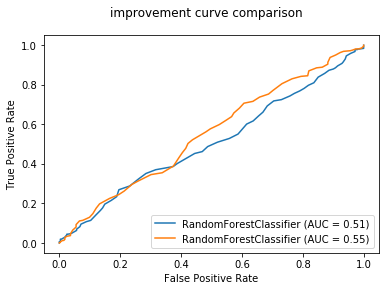

In [380]:
svc_disp = plot_roc_curve(model1, X_test, y_test)
rfc_disp = plot_roc_curve(model7, X_test3, y_test3, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("improvement curve comparison")

plt.show()

In [121]:
#Logistic
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [124]:
cross_val_score(LR, X_train, y_train, cv=3, scoring="roc_auc")

array([0.47835995, 0.47059813, 0.47842991])

In [125]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model2 = LR.fit(X_train,y_train)

In [126]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model2 = LR.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
pred_y = model2.predict(X_test)
conf_mxLR = confusion_matrix(y_test, pred_y)
conf_mxLR

array([[  0, 281],
       [  1, 315]], dtype=int64)

In [127]:
evaluate_model('Logstic', model2, X_test, y_test)

Logstic -- Accuracy:0.528 / Precision:0.529 / Recall:0.997 / F1:0.691 / ROC:0.498 / Latency:0ms


# Part II: Same approach with time lag

#### predict one day lag

In [153]:
df1 = pd.read_csv('News_sentiment.csv')
df1 = df1.drop(droplist, axis = 1)
df1 = df1.drop(['Date', 'Combined'], axis =1)

In [154]:
df1['Label'] = df1['Label'].shift(periods = 1)

In [155]:
df1 = df1.drop(index = 0)

In [156]:
X = df1[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df1['Label']
from sklearn.model_selection import train_test_split
X_train1,X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [157]:
cross_val_score(forest, X_train1, y_train1, cv=3, scoring="roc_auc")

array([0.509     , 0.52396262, 0.51058216])

In [158]:
model3 = forest.fit(X_train1,y_train1)

In [136]:
from sklearn.metrics import confusion_matrix
pred_y = model3.predict(X_test1)
conf_mx3 = confusion_matrix(y_test1, pred_y)
conf_mx3

array([[115, 168],
       [111, 203]], dtype=int64)

In [137]:
evaluate_model('Forest', model3, X_test1, y_test1)

Forest -- Accuracy:0.533 / Precision:0.547 / Recall:0.646 / F1:0.593 / ROC:0.526 / Latency:0ms


In [138]:
# time lag one day seems to be working

In [159]:
cross_val_score(LR, X_train1, y_train1, cv=3, scoring="roc_auc")

array([0.47872897, 0.50157009, 0.50206573])

In [160]:
model4 = LR.fit(X_train1,y_train1)

In [161]:
from sklearn.metrics import confusion_matrix
pred_y = model4.predict(X_test1)
conf_mxLR = confusion_matrix(y_test1, pred_y)
conf_mxLR

array([[  0, 283],
       [  0, 314]], dtype=int64)

In [162]:
evaluate_model('Logstic', model2, X_test, y_test)

Logstic -- Accuracy:0.528 / Precision:0.529 / Recall:0.997 / F1:0.691 / ROC:0.498 / Latency:0ms


#### predit 2 day lag

In [163]:
df2 = pd.read_csv('News_sentiment.csv')
df2 = df2.drop(droplist, axis = 1)
df2 = df2.drop(['Date', 'Combined'], axis =1)
df2['Label'] = df2['Label'].shift(periods = 2)
df2 = df2.drop(index = [0,1])

In [164]:
X = df2[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df2['Label']
from sklearn.model_selection import train_test_split
X_train2,X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [165]:
cross_val_score(forest, X_train2, y_train2, cv=3, scoring="roc_auc")

array([0.47529653, 0.53235184, 0.4982547 ])

In [168]:
model5 = forest.fit(X_train2,y_train2)
from sklearn.metrics import confusion_matrix
pred_y = model5.predict(X_test2)
conf_mx5 = confusion_matrix(y_test2, pred_y)
conf_mx5

array([[118, 162],
       [125, 192]], dtype=int64)

In [169]:
evaluate_model('Forest', model5, X_test2, y_test2)

Forest -- Accuracy:0.519 / Precision:0.542 / Recall:0.606 / F1:0.572 / ROC:0.514 / Latency:0ms


In [170]:
model6 = LR.fit(X_train2,y_train2)
from sklearn.metrics import confusion_matrix
pred_y = model6.predict(X_test2)
conf_mxLR = confusion_matrix(y_test2, pred_y)
conf_mxLR
evaluate_model('Logstic', model6, X_test, y_test)

Logstic -- Accuracy:0.528 / Precision:0.529 / Recall:0.991 / F1:0.689 / ROC:0.499 / Latency:0ms


#### 3 day lag

In [172]:
df3 = pd.read_csv('News_sentiment.csv')
df3 = df3.drop(droplist, axis = 1)
df3 = df3.drop(['Date', 'Combined'], axis =1)
df3['Label'] = df3['Label'].shift(periods = 3)
df3 = df3.drop(index = [0,1,2])

In [173]:
X = df3[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df3['Label']
from sklearn.model_selection import train_test_split
X_train3,X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [174]:
model7 = forest.fit(X_train3,y_train3)
from sklearn.metrics import confusion_matrix
pred_y = model7.predict(X_test3)
conf_mx7 = confusion_matrix(y_test3, pred_y)
conf_mx7

array([[143, 129],
       [137, 187]], dtype=int64)

In [175]:
evaluate_model('Forest', model7, X_test3, y_test3)

Forest -- Accuracy:0.554 / Precision:0.592 / Recall:0.577 / F1:0.584 / ROC:0.551 / Latency:0ms


In [183]:
model8 = LR.fit(X_train3,y_train3)
from sklearn.metrics import confusion_matrix
pred_y = model8.predict(X_test3)
conf_mxLR = confusion_matrix(y_test3, pred_y)
conf_mxLR
evaluate_model('Logstic', model8, X_test3, y_test3)

Logstic -- Accuracy:0.544 / Precision:0.544 / Recall:1.0 / F1:0.704 / ROC:0.5 / Latency:0ms


In [376]:
evaluate_model('Logstic', model7, X_test3, y_test3)

Logstic -- Accuracy:0.544 / Precision:0.581 / Recall:0.577 / F1:0.579 / ROC:0.54 / Latency:0ms


#### 4 day lag

In [177]:
df4 = pd.read_csv('News_sentiment.csv')
df4 = df4.drop(droplist, axis = 1)
df4 = df4.drop(['Date', 'Combined'], axis =1)
df4['Label'] = df4['Label'].shift(periods = 3)
df4 = df4.drop(index = [0,1,2])

In [178]:
X = df4[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df4['Label']
from sklearn.model_selection import train_test_split
X_train4,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [179]:
model9 = forest.fit(X_train4,y_train4)
from sklearn.metrics import confusion_matrix
pred_y = model9.predict(X_test4)
conf_mx9 = confusion_matrix(y_test4, pred_y)
conf_mx9

array([[130, 142],
       [144, 180]], dtype=int64)

In [180]:
evaluate_model('Forest', model9, X_test4, y_test4)

Forest -- Accuracy:0.52 / Precision:0.559 / Recall:0.556 / F1:0.557 / ROC:0.517 / Latency:0ms


In [182]:
model10 = LR.fit(X_train4,y_train4)
from sklearn.metrics import confusion_matrix
pred_y = model8.predict(X_test4)
conf_mxLR = confusion_matrix(y_test4, pred_y)
conf_mxLR
evaluate_model('Logstic', model10, X_test4, y_test4)

Logstic -- Accuracy:0.544 / Precision:0.544 / Recall:1.0 / F1:0.704 / ROC:0.5 / Latency:0ms


#### 5 day lag

In [184]:
df5 = pd.read_csv('News_sentiment.csv')
df5 = df5.drop(droplist, axis = 1)
df5 = df5.drop(['Date', 'Combined'], axis =1)
df5['Label'] = df5['Label'].shift(periods = 3)
df5 = df5.drop(index = [0,1,2])

In [185]:
X = df5[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = df5['Label']
from sklearn.model_selection import train_test_split
X_train5,X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [186]:
model11 = forest.fit(X_train5,y_train5)
from sklearn.metrics import confusion_matrix
pred_y = model11.predict(X_test5)
conf_mx11 = confusion_matrix(y_test5, pred_y)
conf_mx11

array([[137, 135],
       [137, 187]], dtype=int64)

In [187]:
evaluate_model('Forest', model11, X_test5, y_test5)

Forest -- Accuracy:0.544 / Precision:0.581 / Recall:0.577 / F1:0.579 / ROC:0.54 / Latency:0ms


In [189]:
model12 = LR.fit(X_train5,y_train5)
from sklearn.metrics import confusion_matrix
pred_y = model12.predict(X_test5)
conf_mxLR = confusion_matrix(y_test5, pred_y)
conf_mxLR
evaluate_model('Logstic', model12, X_test5, y_test5)

Logstic -- Accuracy:0.544 / Precision:0.544 / Recall:1.0 / F1:0.704 / ROC:0.5 / Latency:0ms


# Conclusion - With purely sentimentscore, the best prediction is for 3 days lag - meaning that the model performs best result when predicting the stock market 3 days later

# PART III: adding TFIDFvectorizer as features

In [197]:
import eli5
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [287]:
dff = pd.read_csv('News_sentiment.csv')
dff = dff.drop(droplist, axis = 1)
dff = dff.drop(['Date'], axis =1)


In [289]:
dff['Combined'][1]

'b\'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?\'_b\'Bush puts foot down on Georgian conflict\'_b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia "_b\'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired\'_b"Olympic opening ceremony fireworks \'faked\'"_b\'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?\'_b\'Russia angered by Israeli military sale to Georgia\'_b\'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people\'_b\'Welcome To World War IV! Now In High Definition!\'_b"Georgia\'s move, a mistake of monumental proportions "_b\'Russia presses deeper into Georgia; U.S. says regime change is goal\'_b\'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India\'_b\' U.S. ship heads for Arctic to define territory\'_b\'Drivers in a Jerusalem taxi station threaten to quit ra

In [285]:
dff['Combined'][1]

In [222]:
#dff = dff.drop(droplist, axis = 1)

In [195]:
#dff = dff.drop('Date', axis =1)

In [225]:
dff3

,Label,Combined,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
3,0.0,b' U.S. refuses Israel weapons to attack Iran:...,0.011398,0.364021,0.048,0.146,-0.9842
4,1.0,b'All the experts admit that we should legalis...,0.040677,0.375099,0.093,0.174,-0.9774
5,0.0,"b""Mom of missing gay man: Too bad he's not a 2...",0.047756,0.457692,0.059,0.165,-0.9856
6,0.0,"b'In an Afghan prison, the majority of female ...",0.016759,0.485995,0.042,0.224,-0.9938
7,1.0,"b""Man arrested and locked up for five hours af...",-0.025814,0.345230,0.056,0.240,-0.9959
...,...,...,...,...,...,...,...
1984,0.0,Barclays and RBS shares suspended from trading...,-0.030183,0.358892,0.090,0.151,-0.9683
1985,1.0,"2,500 Scientists To Australia: If You Want To ...",0.047618,0.360663,0.100,0.137,-0.9633
1986,0.0,Explosion At Airport In Istanbul_Yemeni former...,0.046901,0.406462,0.076,0.209,-0.9968
1987,0.0,Jamaica proposes marijuana dispensers for tour...,-0.005811,0.392035,0.053,0.211,-0.9978


In [227]:
texts = dff3['Combined']

In [242]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (2,2))
tfidf.fit(texts)
X = tfidf.transform(texts)

In [243]:
y= dff3['Label']


In [244]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [245]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
cross_val_score(forest, X_train, y_train, cv=3, scoring="roc_auc")

array([0.54528418, 0.51219512, 0.4796186 ])

In [247]:
model13 = forest.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
pred_y = model13.predict(X_test)
conf_mx11 = confusion_matrix(y_test, pred_y)
conf_mx11

array([[  7, 265],
       [ 10, 314]], dtype=int64)

# Since matrix is so sparse, trying l1 regularization with LightGBM

In [384]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD

In [397]:
dfff = pd.read_csv('News_sentiment.csv')
dfff = dfff.drop(droplist, axis = 1)
dfff = dfff.drop(['Date'], axis =1)
X = dfff[['tb_polarity', 'vader_pos', 'vader_neg', 'tb_subjectivity']]
y = dfff['Label']

In [398]:
texts = dfff['Combined']
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
tfidf.fit(texts)
X2 = tfidf.transform(texts)

In [402]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=5) #42

In [403]:
model21 = forest.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
pred_y = model21.predict(X_test)
conf_mx21 = confusion_matrix(y_test, pred_y)
conf_mx21

array([[ 53, 228],
       [ 58, 258]], dtype=int64)

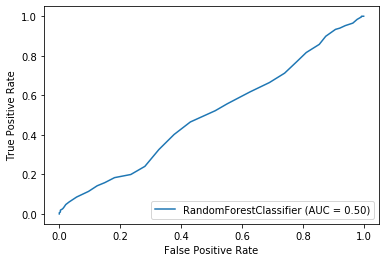

In [404]:
plot_roc_curve(model21, X_test, y_test)

In [405]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(reg_alpha = 0.1)

In [400]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(lgbm, X_train, y_train, cv=5, scoring="roc_auc")

array([0.48320413, 0.44702842, 0.47510535, 0.46130208, 0.49088542])

In [406]:
model15 = lgbm.fit(X_train,y_train)

In [407]:
from sklearn.metrics import confusion_matrix
pred_y = model15.predict(X_test)
conf_mx11 = confusion_matrix(y_test, pred_y)
conf_mx11

array([[104, 177],
       [112, 204]], dtype=int64)

In [408]:
evaluate_model('LGBM', model15, X_test, y_test)

LGBM -- Accuracy:0.516 / Precision:0.535 / Recall:0.646 / F1:0.585 / ROC:0.508 / Latency:0ms


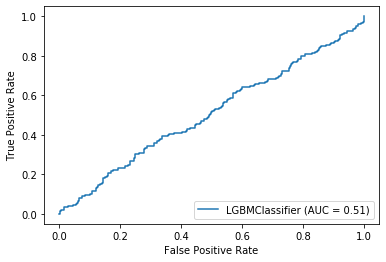

In [409]:
plot_roc_curve(model15, X_test, y_test)

In [410]:
df3 = pd.read_csv('News_sentiment.csv')
df3 = df3.drop(droplist, axis = 1)
df3 = df3.drop(['Date'], axis =1)
df3['Label'] = df3['Label'].shift(periods = 3)
df3 = df3.drop(index = [0,1,2])

X3 = df3['Combined']
y3 = df3['Label']

In [412]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
X3 = tfidf.fit_transform(X3)

# SVD

In [434]:
from sklearn.decomposition import TruncatedSVD
factors = TruncatedSVD(5).fit_transform(X3)

In [435]:
X_train,X_test, y_train, y_test = train_test_split(factors, y3, test_size=0.3, random_state=5) #42

In [438]:
model22 = forest.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
pred_y = model22.predict(X_test)
conf_mx21 = confusion_matrix(y_test, pred_y)
conf_mx21

array([[125, 147],
       [142, 182]], dtype=int64)

In [439]:
evaluate_model('RF_SVD', model22, X_test, y_test)

RF_SVD -- Accuracy:0.515 / Precision:0.553 / Recall:0.562 / F1:0.557 / ROC:0.511 / Latency:0ms


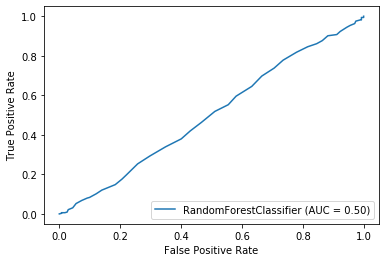

In [431]:
plot_roc_curve(model22, X_test, y_test)

In [432]:
model23 = lgbm.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
pred_y = model23.predict(X_test)
conf_mx21 = confusion_matrix(y_test, pred_y)
conf_mx21

array([[109, 163],
       [145, 179]], dtype=int64)

In [433]:
evaluate_model('RF_SVD', model23, X_test, y_test)

RF_SVD -- Accuracy:0.483 / Precision:0.523 / Recall:0.552 / F1:0.538 / ROC:0.477 / Latency:0ms


# PCA

In [440]:
pca = PCA(20)

In [442]:
PCAed = pca.fit_transform(X3)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [1]:
# ok PCA doens't work with sparse matrix

# Trying Embedding with Word2Vec

In [2]:
import gensim.utils
import gensim.downloader as api

In [6]:
dfff = pd.read_csv('News_sentiment.csv')
droplist = ['Top'+ str(i) for i in range(1,26)]
dfff = dfff.drop(droplist, axis = 1)
dfff = dfff.drop(['Date'], axis =1)
X = dfff['Combined']
y = dfff['Label']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #42

In [18]:
X_train.toks = []
for s in X_train:
    X_train.toks.append(gensim.utils.simple_preprocess(s))
X_test.toks = []
for s in X_test:
    X_test.toks.append(gensim.utils.simple_preprocess(s))

In [22]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(X_train.toks, size=100, window=5, min_count=5, workers=4)
word_vectors = model.wv


In [49]:
model.wv.most_similar(['plunge'])

[('metal', 0.9943884611129761),
 ('mathematics', 0.9943128824234009),
 ('belt', 0.9939191341400146),
 ('mortality', 0.9932832717895508),
 ('inciting', 0.9929698705673218),
 ('dams', 0.9929454922676086),
 ('residential', 0.9926624894142151),
 ('super', 0.992295503616333),
 ('spills', 0.9921430945396423),
 ('polio', 0.9920408725738525)]

In [7]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(X)

In [11]:
model